In [1]:
#Unit 2 homework assignment
#Jeremy Koertzen
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
class Charge:
    def __init__(self,x,y,q):
        self.x = x
        self.y = y
        self.q = q
        return
    def potential(self,xgrid,ygrid):
        distance = ((self.x - xgrid)**2 + (self.y - ygrid)**2 )**0.5
        return (self.q/distance)
    def efield(self,xgrid,ygrid):
        deltax = -self.x + xgrid
        deltay = -self.y + ygrid
        distance = ((self.x - xgrid)**2 + (self.y - ygrid)**2 )**0.5
        Ex = (self.q * deltax)/(distance**3)
        Ey = (self.q * deltay)/(distance**3)
        return (Ex,Ey)
    def efield_deriv(self,xgrid,ygrid):
        deltax = -self.x + xgrid
        deltay = -self.y + ygrid
        distance = ((self.x - xgrid)**2 + (self.y - ygrid)**2 )**0.5
        Ex = -2*(self.q * deltax)/(distance**2)
        Ey = -2*(self.q * deltay)/(distance**2)
        return (Ex,Ey)



[[-0.02205383 -0.00037344 -0.00033299 ... -0.0002841  -0.00033299
  -0.02203562]
 [-0.02347835 -0.00045523 -0.00041599 ... -0.00036734 -0.00041599
  -0.02346095]
 [-0.02499888 -0.00054906 -0.00051211 ... -0.00046478 -0.00051211
  -0.02498285]
 ...
 [-0.02499888 -0.00054906 -0.00051211 ... -0.00046478 -0.00051211
  -0.02498285]
 [-0.02347835 -0.00045523 -0.00041599 ... -0.00036734 -0.00041599
  -0.02346095]
 [-0.02205383 -0.00037344 -0.00033299 ... -0.0002841  -0.00033299
  -0.02203562]]
[[  1.7447298   62.33210121  66.15977114 ... -70.34082433 -66.15977114
   -1.85133947]
 [  3.37795177  72.82121776  75.08209536 ... -77.46091545 -75.08209536
   -3.59145751]
 [  3.36924068  70.73133172  72.97952352 ... -75.34860535 -72.97952352
   -3.59732696]
 ...
 [ -3.36924068 -70.73133172 -72.97952352 ...  75.34860535  72.97952352
    3.59732696]
 [ -3.37795177 -72.82121776 -75.08209536 ...  77.46091545  75.08209536
    3.59145751]
 [ -1.7447298  -62.33210121 -66.15977114 ...  70.34082433  66.159771

C:\Users\Jeremy Koertzen\AppData\Local\Temp\ipykernel_20904\3843845407.py:9: RuntimeWarning: divide by zero encountered in divide
  return (self.q/distance)


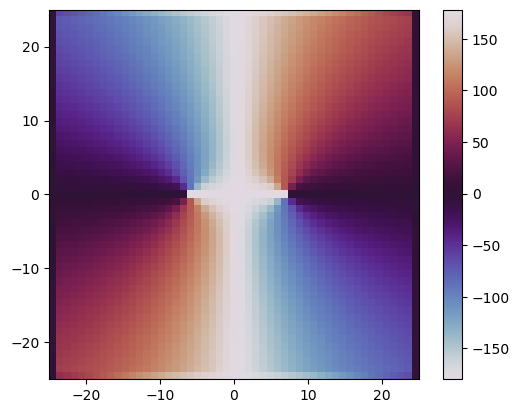

In [3]:
#Practice

x1 = 3.2
y1 = 2.7
q = 1

coords = np.mgrid[-25:26,-25:26]
xgrid = coords[1,:,:]
ygrid = coords[0,:,:]

chargelist = [Charge(-6,0,-3),Charge(7,0,3)]

v = np.zeros((51,51))

for charge in chargelist:
    v += charge.potential(xgrid,ygrid)

#print(v)

xshiftR = np.roll(v,1,1)
xshiftL = np.roll(v,-1,1)
yshiftR = np.roll(v,1,0)
yshiftL = np.roll(v,-1,0)
#print(xshiftR)

Ex = (-(xshiftR)+(xshiftL))/(2)
Ey = (-(yshiftR)+(yshiftL))/(2)
E = np.array([Ex,Ey])
print(Ex)
#print(np.size(v,1))

#print(np.size(v,2))

anglerad = np.arctan2(-Ey,-Ex)
#print(anglerad)
angledeg = np.degrees(anglerad)
print(angledeg)

plt.imshow(angledeg,extent=[-25,25,-25,25],origin='lower',cmap='twilight')
plt.colorbar()


In [4]:
#Practice



[[ 72.63020546  74.7879651   77.05499438 ... -79.43803977 -77.05499438
  -74.7879651 ]
 [ 70.61938317  72.76354877  75.01936547 ... -77.39394157 -75.01936547
  -72.76354877]
 [ 68.54654444  70.6744351   72.9163704  ... -75.27984708 -72.9163704
  -70.6744351 ]
 ...
 [-68.54654444 -70.6744351  -72.9163704  ...  75.27984708  72.9163704
   70.6744351 ]
 [-70.61938317 -72.76354877 -75.01936547 ...  77.39394157  75.01936547
   72.76354877]
 [-72.63020546 -74.7879651  -77.05499438 ...  79.43803977  77.05499438
   74.7879651 ]]


C:\Users\Jeremy Koertzen\AppData\Local\Temp\ipykernel_20904\3843845407.py:14: RuntimeWarning: invalid value encountered in divide
  Ex = (self.q * deltax)/(distance**3)
C:\Users\Jeremy Koertzen\AppData\Local\Temp\ipykernel_20904\3843845407.py:15: RuntimeWarning: invalid value encountered in divide
  Ey = (self.q * deltay)/(distance**3)


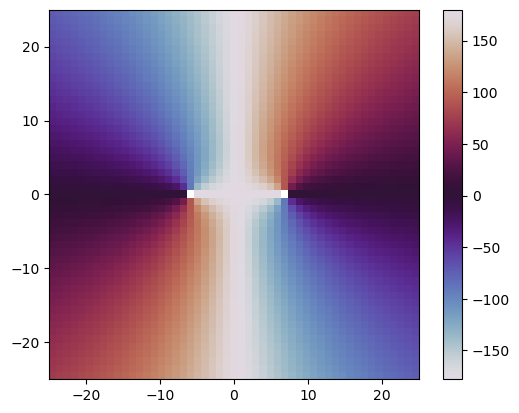

In [5]:
coords = np.mgrid[-25:26,-25:26]
xgrid = coords[1,:,:]
ygrid = coords[0,:,:]




Exx = np.zeros((51,51))
Eyy = np.zeros((51,51))

for charge in chargelist:
    Ex,Ey = charge.efield(xgrid,ygrid)
    Exx += Ex
    Eyy += Ey

anglerad = np.arctan2(Eyy,Exx)
#print(anglerad)
angledeg = np.degrees(anglerad)
print(angledeg)

plt.imshow(angledeg,extent=[-25,25,-25,25],origin='lower',cmap='twilight')
plt.colorbar()

[[-0.02205383 -0.00037344 -0.00033299 ... -0.0002841  -0.00033299
  -0.02203562]
 [-0.02347835 -0.00045523 -0.00041599 ... -0.00036734 -0.00041599
  -0.02346095]
 [-0.02499888 -0.00054906 -0.00051211 ... -0.00046478 -0.00051211
  -0.02498285]
 ...
 [-0.02499888 -0.00054906 -0.00051211 ... -0.00046478 -0.00051211
  -0.02498285]
 [-0.02347835 -0.00045523 -0.00041599 ... -0.00036734 -0.00041599
  -0.02346095]
 [-0.02205383 -0.00037344 -0.00033299 ... -0.0002841  -0.00033299
  -0.02203562]]
[[  1.7447298   62.33210121  66.15977114 ... -70.34082433 -66.15977114
   -1.85133947]
 [  3.37795177  72.82121776  75.08209536 ... -77.46091545 -75.08209536
   -3.59145751]
 [  3.36924068  70.73133172  72.97952352 ... -75.34860535 -72.97952352
   -3.59732696]
 ...
 [ -3.36924068 -70.73133172 -72.97952352 ...  75.34860535  72.97952352
    3.59732696]
 [ -3.37795177 -72.82121776 -75.08209536 ...  77.46091545  75.08209536
    3.59145751]
 [ -1.7447298  -62.33210121 -66.15977114 ...  70.34082433  66.159771

C:\Users\Jeremy Koertzen\AppData\Local\Temp\ipykernel_20904\3843845407.py:9: RuntimeWarning: divide by zero encountered in divide
  return (self.q/distance)


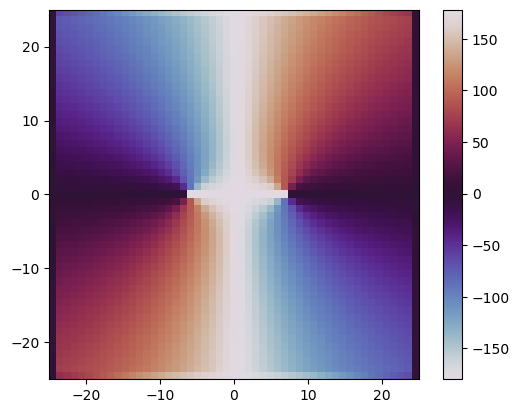

In [12]:
#Problem 1:

#Calculating the potential using mgrid (same as last homework):

coords = np.mgrid[-25:26,-25:26]
xgrid = coords[1,:,:]
ygrid = coords[0,:,:]

chargelist = [Charge(-6,0,-3),Charge(7,0,3)]

v = np.zeros((51,51))

for charge in chargelist:
    v += charge.potential(xgrid,ygrid)

#Using np.roll to implement the gradient to calculate Ex and Ey:

xshiftR = np.roll(v,1,1)
xshiftL = np.roll(v,-1,1)
yshiftR = np.roll(v,1,0)
yshiftL = np.roll(v,-1,0)

Ex = (-(xshiftR)+(xshiftL))/(2)
Ey = (-(yshiftR)+(yshiftL))/(2)
E = np.array([Ex,Ey])
print(Ex)

#Creating the graph of the direction of the E field:

anglerad = np.arctan2(-Ey,-Ex)
angledeg = np.degrees(anglerad)
print(angledeg)

plt.imshow(angledeg,extent=[-25,25,-25,25],origin='lower',cmap='twilight')
plt.colorbar()

#Note: The edges of the graph are incorrect because the calculation
#of E depends on the values to right, left, above, and below it.
#The edges of the grid do not all have a value to right, left, above,
#or below, so the calulaiton of the gradient is not correct at the
#boundary. 


C:\Users\Jeremy Koertzen\AppData\Local\Temp\ipykernel_20904\3843845407.py:9: RuntimeWarning: divide by zero encountered in divide
  return (self.q/distance)
C:\Users\Jeremy Koertzen\AppData\Local\Temp\ipykernel_20904\3843845407.py:14: RuntimeWarning: invalid value encountered in divide
  Ex = (self.q * deltax)/(distance**3)
C:\Users\Jeremy Koertzen\AppData\Local\Temp\ipykernel_20904\3843845407.py:15: RuntimeWarning: invalid value encountered in divide
  Ey = (self.q * deltay)/(distance**3)
C:\Users\Jeremy Koertzen\AppData\Local\Temp\ipykernel_20904\3091496541.py:38: RuntimeWarning: invalid value encountered in divide
  Ey_diff = (Ey_calc-Eyy) / Eyy


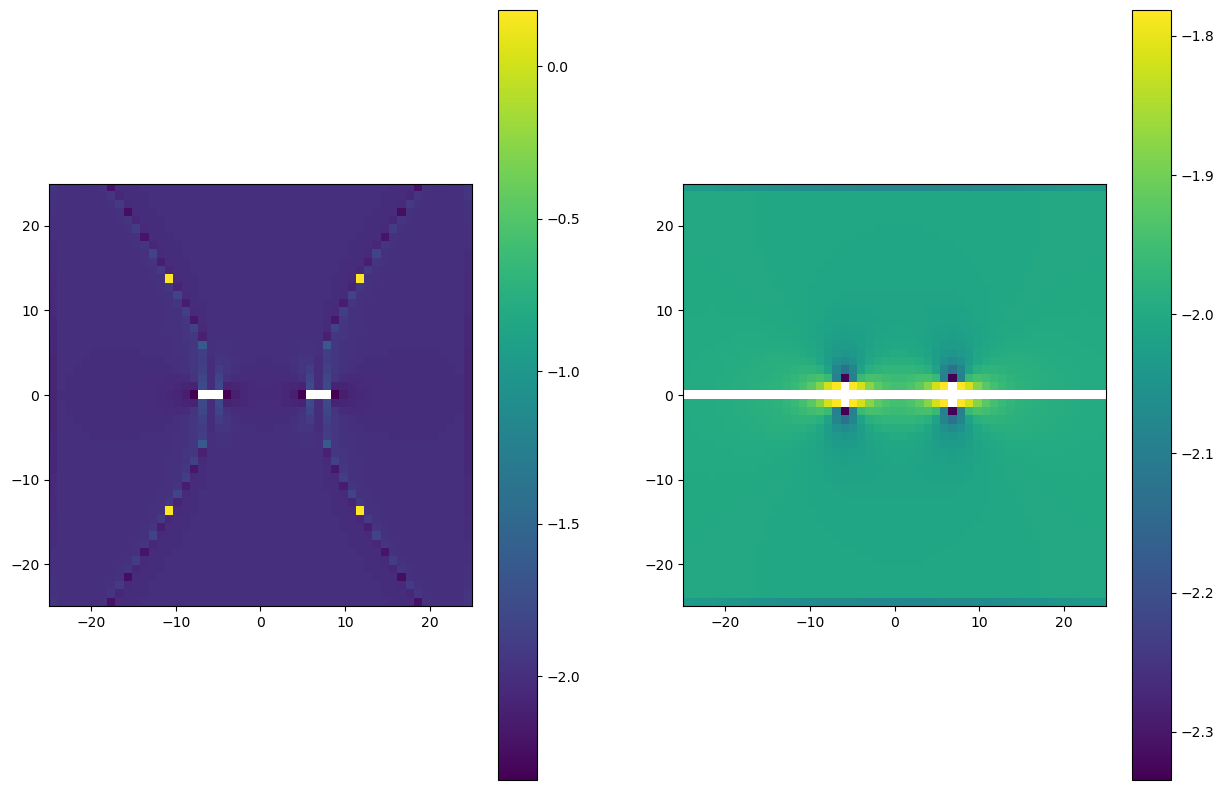

In [30]:
#Problem 2:

#Creating the axes:

fig, axs = plt.subplots(1,2,figsize = [15,10])

#Using the gradient of V to calculate E:

coords = np.mgrid[-25:26,-25:26]
xgrid = coords[1,:,:]
ygrid = coords[0,:,:]

chargelist = [Charge(-6,0,-3),Charge(7,0,3)]

v = np.zeros((51,51))

for charge in chargelist:
    v += charge.potential(xgrid,ygrid)

E = np.gradient(v)

Ex_calc = E[1]
Ey_calc = E[0]

#Calculating E directly:

Exx = np.zeros((51,51))
Eyy = np.zeros((51,51))

for charge in chargelist:
    Ex,Ey = charge.efield(xgrid,ygrid)
    Exx += Ex
    Eyy += Ey

#Calculating the fractional difference:

Ex_diff = (Ex_calc-Exx) / Exx
Ey_diff = (Ey_calc-Eyy) / Eyy

image1 = axs[0].imshow(Ex_diff,extent=[-25,25,-25,25],origin='lower')
image2 = axs[1].imshow(Ey_diff,extent=[-25,25,-25,25],origin='lower')
fig.colorbar(image1,ax = axs[0])
fig.colorbar(image2,ax = axs[1])

#Considering that the actual value of E is
#three times as large as the gradient value,
#machiene precision is not a significant source
#of error in comparison. 


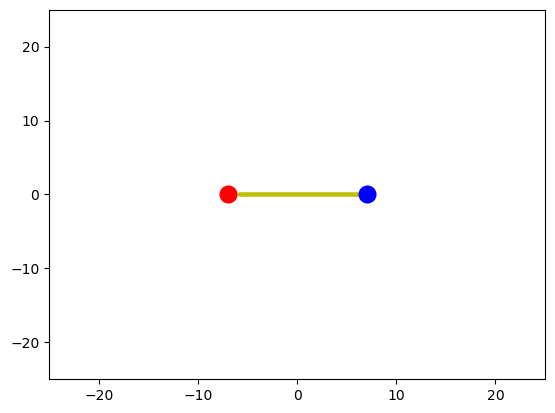

In [7]:
#Problem 3:

#Creating the field line straight from positive to negative:

step = 0.1
chargelist = [Charge(-7,0,3),Charge(7,0,-3)]

x = -6.0
y = 0

def net_field(chargelist,x,y):
    Ex_net = 0
    Ey_net = 0
    for charge in chargelist:
        Ex,Ey = charge.efield(x,y)
        Ex_net += Ex
        Ey_net += Ey
    return Ex_net,Ey_net

len = np.size(x)
r = 1
while(r >= step):       #Make sure range value is correct.
#for i in range(12):
    if((x >= 25) or (x <= -25) or (y >= 25) or (y <= -25)):
        x = -x
    Ex = net_field(chargelist,x,y)[0]
    Ey = net_field(chargelist,x,y)[1]
    E = (Ex**2 + Ey**2)**0.5
    x += (Ex / E)*step
    y += (Ey / E)*step
    r = ((0-y)**2 + (7-x)**2)**0.5
    plt.xlim(-25,25)
    plt.ylim(-25,25)
    plt.plot(x,y,'yo',markersize=2)  

plt.plot(-7,0,'ro',markersize=12)
plt.plot(7,0,'bo',markersize=12)
        

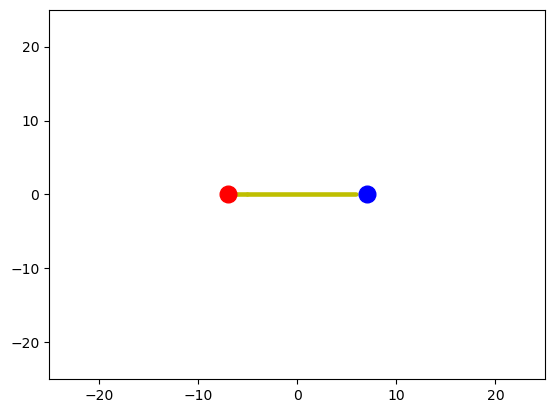

In [8]:
#Problem 3b: field line from negative to positive:

x = 6.0
y = 0

len = np.size(x)
r = 1
while(r >= step):       #Make sure range value is correct.
#for i in range(12):
    if((x >= 25) or (x <= -25) or (y >= 25) or (y <= -25)):
        x = -x
    Ex = net_field(chargelist,x,y)[0]
    Ey = net_field(chargelist,x,y)[1]
    E = (Ex**2 + Ey**2)**0.5
    x -= (Ex / E)*step
    y -= (Ey / E)*step
    r = ((0-y)**2 + (-7-x)**2)**0.5
    plt.xlim(-25,25)
    plt.ylim(-25,25)
    plt.plot(x,y,'yo',markersize=2)  

plt.plot(-7,0,'ro',markersize=12)
plt.plot(7,0,'bo',markersize=12)



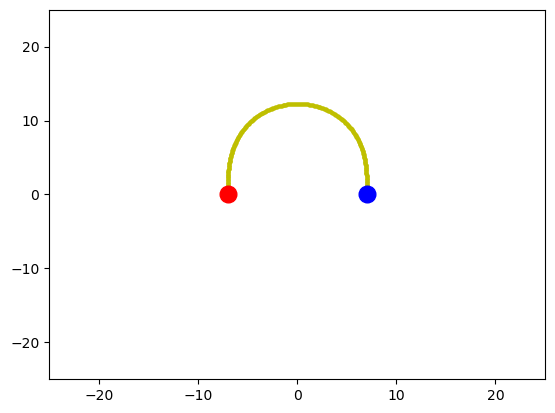

In [9]:
#Problem 3c: field line perpendicular:

x = -7.0
y = step

len = np.size(x)
r = 1
while(r >= step):       #Make sure range value is correct.
#for i in range(12):
    if((x >= 25) or (x <= -25) or (y >= 25) or (y <= -25)):
        x = -x
    Ex = net_field(chargelist,x,y)[0]
    Ey = net_field(chargelist,x,y)[1]
    E = (Ex**2 + Ey**2)**0.5
    x += (Ex / E)*step
    y += (Ey / E)*step
    r = ((0-y)**2 + (7-x)**2)**0.5
    plt.xlim(-25,25)
    plt.ylim(-25,25)
    plt.plot(x,y,'yo',markersize=2)  

plt.plot(-7,0,'ro',markersize=12)
plt.plot(7,0,'bo',markersize=12)
        

In [31]:
#Problem 3d:

#The actual trajectory of a charged particle
#depends on initial velocity, mass, and charge.
#What we are modeling is a charge with no
#initial velocity and with a mass and charge
#of 1.

In [10]:
step = 0.1

def derivative(f):
    delta = step*f(x)
    fprime = (f(x+delta)-f(x-delta))/(2*delta)
    return fprime



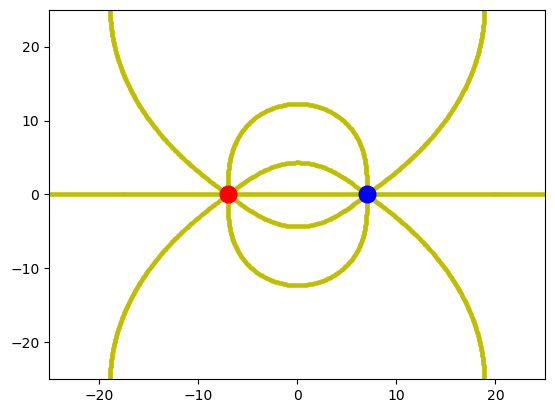

In [11]:
#Problem 4:

#Creating the field lines:

chargelist = [Charge(-7,0,3),Charge(7,0,-3)]

#y1 = chargelist[0][1] + 1
#x1 = chargelist[0][0] + 1
y = np.array([0,0+step,0+step,0+step,0,0-step,0-step,0-step])
x = np.array([-7+step,-7+step,-7,-7-step,-7-step,-7-step,-7,-7+step])
#y = np.array([0.0,0.0+step,0.1,0])
#x = np.array([,-6.9,-6.9,-7.1])
step = 0.1


def net_field(chargelist,x,y):
    Ex_net = 0
    Ey_net = 0
    for charge in chargelist:
        Ex,Ey = charge.efield(x,y)
        Ex_net += Ex
        Ey_net += Ey
    return Ex_net,Ey_net

len = np.size(x)
for i in range(len):
    #print(y[i])
    r = 1
    while(r >= step):       #Make sure range value is correct.
#for i in range(12):
        if((x[i] >= 25) or (x[i] <= -25) or (y[i] >= 25) or (y[i] <= -25)):
            x[i] = -x[i]
        Ex = net_field(chargelist,x[i],y[i])[0]
        Ey = net_field(chargelist,x[i],y[i])[1]
        E = (Ex**2 + Ey**2)**0.5
        x[i] += (Ex / E)*step
        y[i] += (Ey / E)*step
        r = ((0-y[i])**2 + (7-x[i])**2)**0.5
        plt.xlim(-25,25)
        plt.ylim(-25,25)
        plt.plot(x[i],y[i],'yo',markersize=2)  

plt.plot(-7,0,'ro',markersize=12)
plt.plot(7,0,'bo',markersize=12)
        
